## Tictac toe segmentation

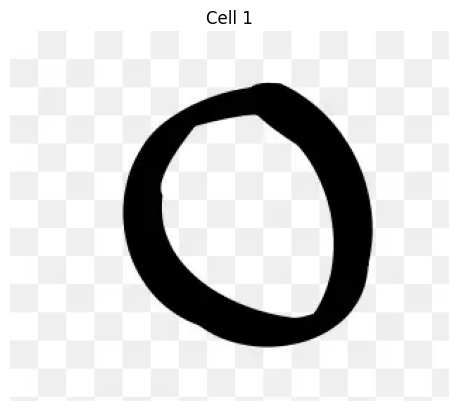

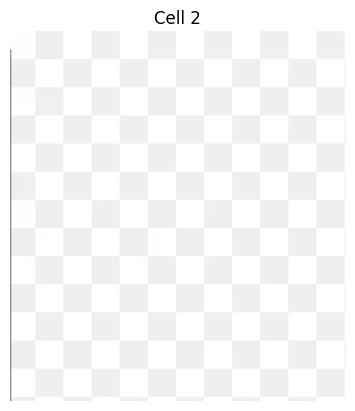

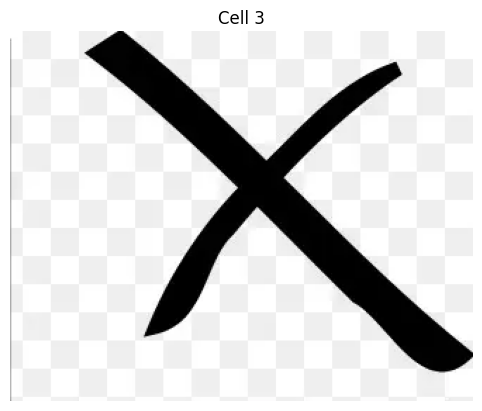

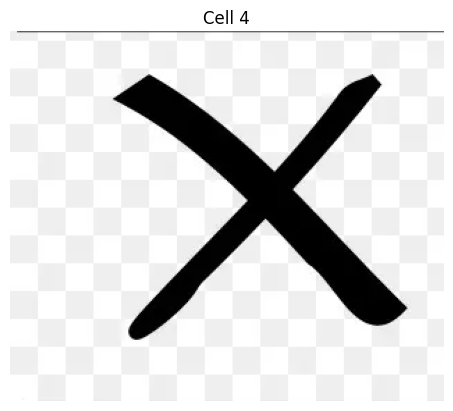

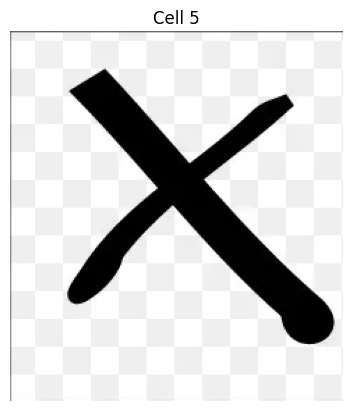

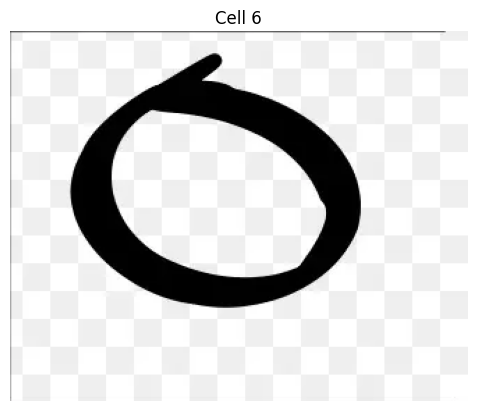

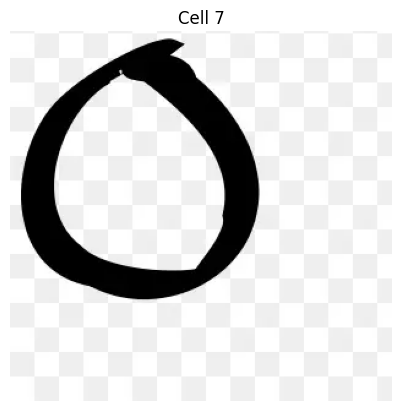

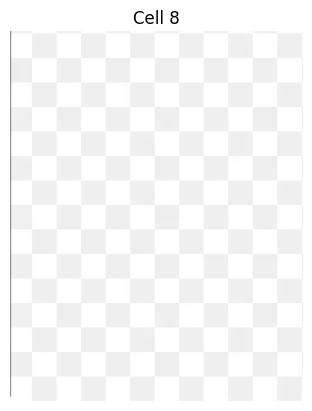

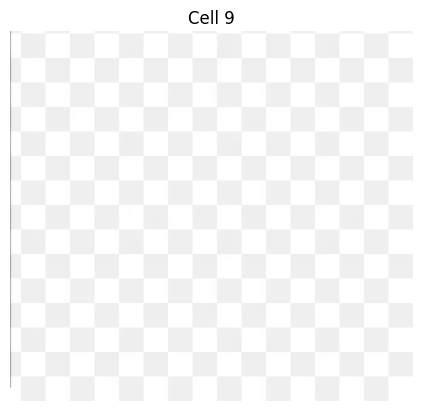

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
tictac = cv2.imread("images/tictac.png")
image = tictac

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect edges
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Detect lines using Hough Transform
lines = cv2.HoughLines(edges, 1, np.pi/180, 150)

# Extract line coordinates
horizontal_lines = []
vertical_lines = []

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * a)
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * a)

    # Separate horizontal and vertical lines based on the angle (theta)
    if 0 <= theta < np.pi / 4 or np.pi * 3 / 4 <= theta <= np.pi:
        vertical_lines.append(rho)
    else:
        horizontal_lines.append(rho)

# Add image borders as lines
height, width = gray.shape
horizontal_lines.extend([0, height])  # Top and bottom borders
vertical_lines.extend([0, width])    # Left and right borders

# Sort lines to determine grid layout
horizontal_lines = sorted(horizontal_lines)
vertical_lines = sorted(vertical_lines)

# Crop spaces between lines
cropped_regions = []

for i in range(len(horizontal_lines) - 1):
    for j in range(len(vertical_lines) - 1):
        # Get the coordinates of the bounding box
        y1 = int(horizontal_lines[i])
        y2 = int(horizontal_lines[i + 1])
        x1 = int(vertical_lines[j])
        x2 = int(vertical_lines[j + 1])

        # Crop the region
        cropped = image[y1:y2, x1:x2]

        # Filter regions by size (to exclude empty or grid-only areas)
        if cropped.shape[0] > 50 and cropped.shape[1] > 50:  # Adjust size threshold as needed
            cropped_regions.append(cropped)

# Plot the regions with X's and O's
for i, region in enumerate(cropped_regions):
    plt.figure()
    plt.title(f"Cell {i+1}")
    plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()


In [36]:
tictac.shape

(900, 900, 3)